In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# initialize dictionary of company data
# each dict contains, main dataset, main w/o date, X_train, y_train, X_test, y_test in that order
companies = ['AAPL', 'MSFT', 'AMZN', 'INTC', 'TSLA']
# all_data = dict.fromkeys(companies, [pd.DataFrame(),pd.DataFrame(), pd.DataFrame(),[],pd.DataFrame(),[]])

In [2]:
# pd.DataFrame(),pd.DataFrame(), pd.DataFrame(),[],pd.DataFrame(),[]
main_data = dict.fromkeys(companies, pd.DataFrame)
X_split_data = dict.fromkeys(companies, pd.DataFrame)
X_train_data = dict.fromkeys(companies, pd.DataFrame)
y_train_data = dict.fromkeys(companies, [])
X_test_data = dict.fromkeys(companies, pd.DataFrame)
y_test_data = dict.fromkeys(companies, [])

In [3]:
split_percentage = 0.8
def init_data(companies):
#     pd.DataFrame(),pd.DataFrame(), pd.DataFrame(),[],pd.DataFrame(),
    for comp in companies:
        main_data[comp] = pd.read_csv(f'./rsc/{comp}_data.csv', sep = ',')
        main_data[comp].dropna()
        y = np.where(main_data[comp]['close'].shift(-1) > main_data[comp]['close'],1,-1)
        main_data[comp]['Open-Close'] = main_data[comp].open - main_data[comp].close
        main_data[comp]['High-Low'] = main_data[comp].high - main_data[comp].low
        X = main_data[comp][main_data[comp].columns[1:]]
        split = int(split_percentage*len(main_data[comp]['date']))
        X_split_data[comp] = main_data[comp][split:]
        X_train_data[comp] = X[:split]
        y_train_data[comp] = y[:split]
        X_test_data[comp] = X[split:]
        y_test_data[comp] = y[split:]
        
init_data(companies)

In [4]:
def train_model(main_dataset, X_split_dataset, X_train_dataset, y_train_dataset, X_test_dataset, y_test_dataset, split_percentage,companies):
    for comp in companies:   
        main_data = pd.DataFrame(main_dataset[comp])
        split = int(split_percentage* len(main_data) )
        X_data = X_split_data[comp]
        X_train = X_train_dataset[comp]
        y_train = y_train_dataset[comp]
        X_test = X_test_dataset[comp]
        y_test = y_test_dataset[comp]
        gbm = xgb.XGBClassifier(max_depth = 7, n_estimators = 275, learning_rate = 0.1).fit(X_train,y_train)
        predictions = gbm.predict(X_test)
        # compare accuracy by comparing actual values of trading signal with predicted values of trading signal
        accuracy_train = accuracy_score(y_train, gbm.predict(X_train))
        accuracy_test = accuracy_score(y_test, predictions)
        print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
        print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))
        # set date as index for plotting data'
        if X_data.index.name != "date":
            X_data.set_index('date', inplace=True)
        
#         main_data['Predicted_Signal'] = gbm.predict(X_test_data)
#         main_data['Return'] = np.log(main_data.close.shift(-1) / main_data.close)*100
#         main_data['Strategy_Return'] = main_data.Return[split:] * main_data['Predicted_Signal']
#         main_data.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
#         plt.ylabel(f"\n{comp} Strategy Returns (%)")
#         plt.show()

        X_data.loc[:,'Predicted_Signal'] = gbm.predict(X_test)
        X_data.loc[:,'Return'] = y_test
        X_data.loc[:,'Strategy_Return'] = X_data.loc[:,'Return'] * X_data.loc[:,'Predicted_Signal']
        X_data.loc[:,'Strategy_Return'].cumsum().plot(figsize=(10,4))
        plt.ylabel(f"\n{comp} Strategy Returns (%)")
        plt.show()
         
        


Train Accuracy: 100.00%
Test Accuracy: 63.19%


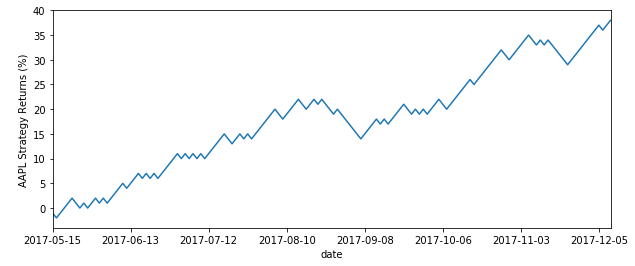


Train Accuracy: 100.00%
Test Accuracy: 57.93%


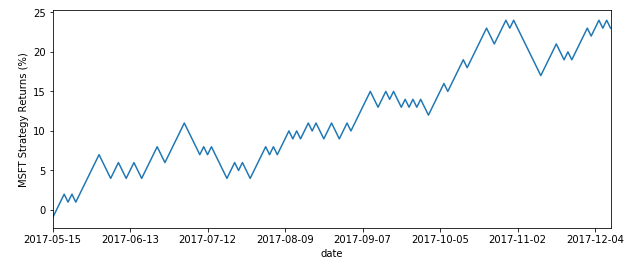


Train Accuracy: 100.00%
Test Accuracy: 52.78%


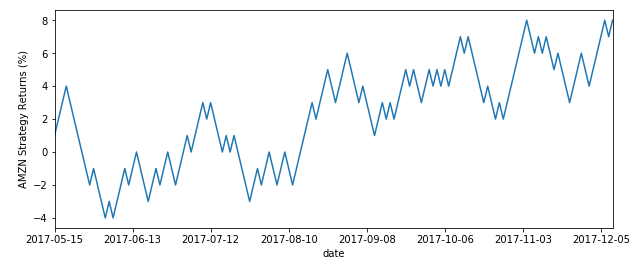


Train Accuracy: 100.00%
Test Accuracy: 62.50%


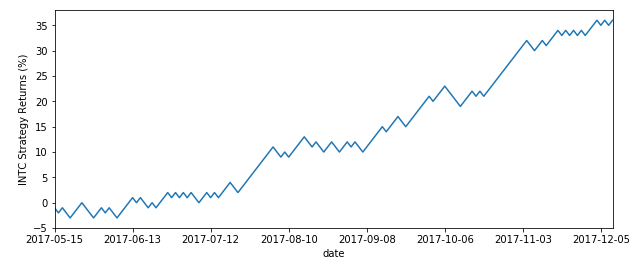


Train Accuracy: 100.00%
Test Accuracy: 55.86%


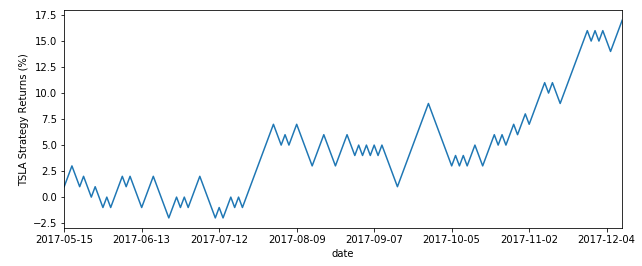

In [5]:
import warnings
warnings.filterwarnings('ignore')
train_model(main_dataset= main_data, X_split_dataset= X_split_data, X_train_dataset= X_train_data, y_train_dataset= y_train_data, X_test_dataset= X_test_data, y_test_dataset=y_test_data, companies = companies, split_percentage = 0.8)
